In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [2]:
df=pd.read_csv("wine.csv")
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


# Visualization

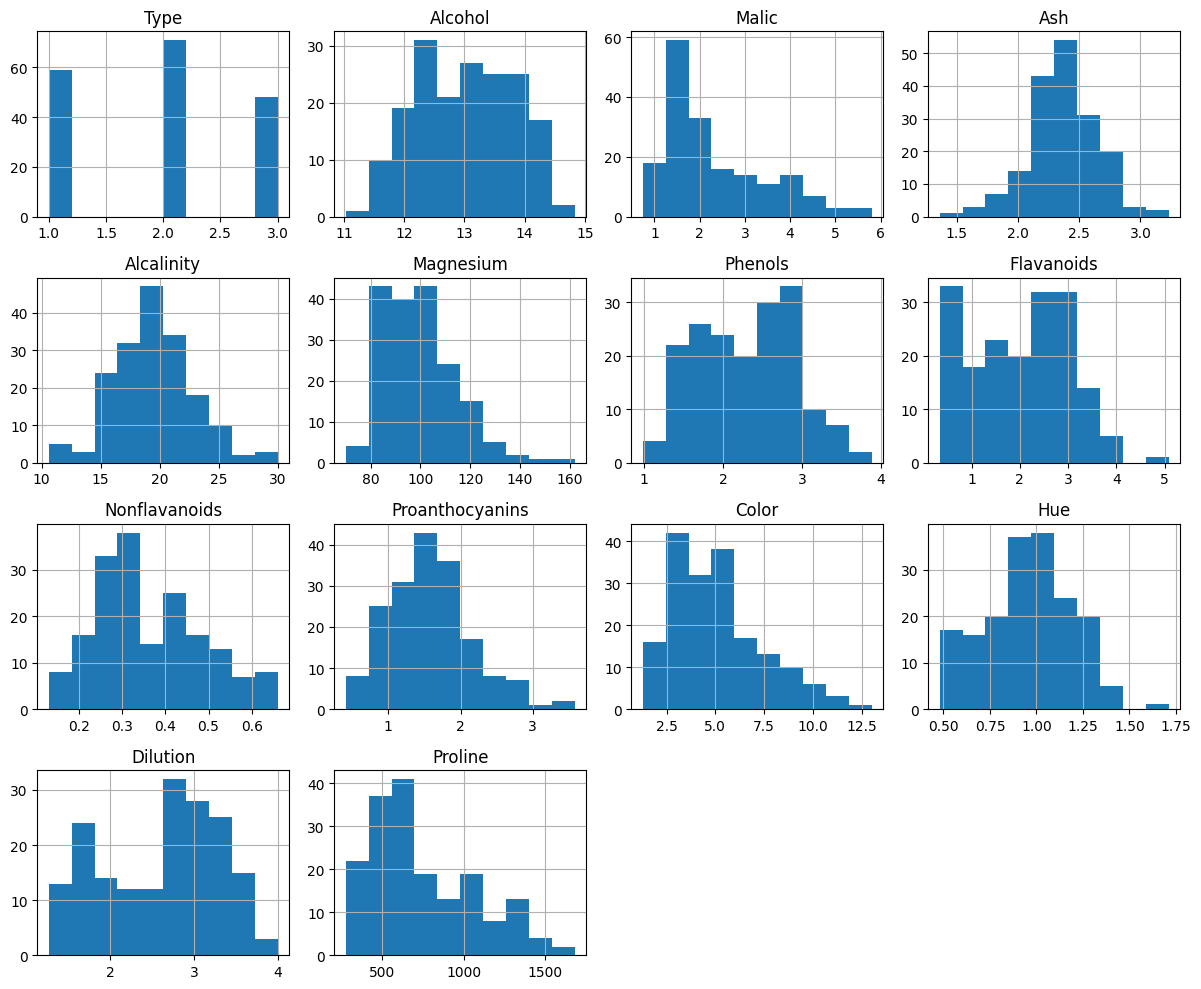

In [5]:
df.hist(figsize=(12,10))
plt.tight_layout()
plt.show()

In [6]:
df.corr()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Type,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoids,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


<Axes: >

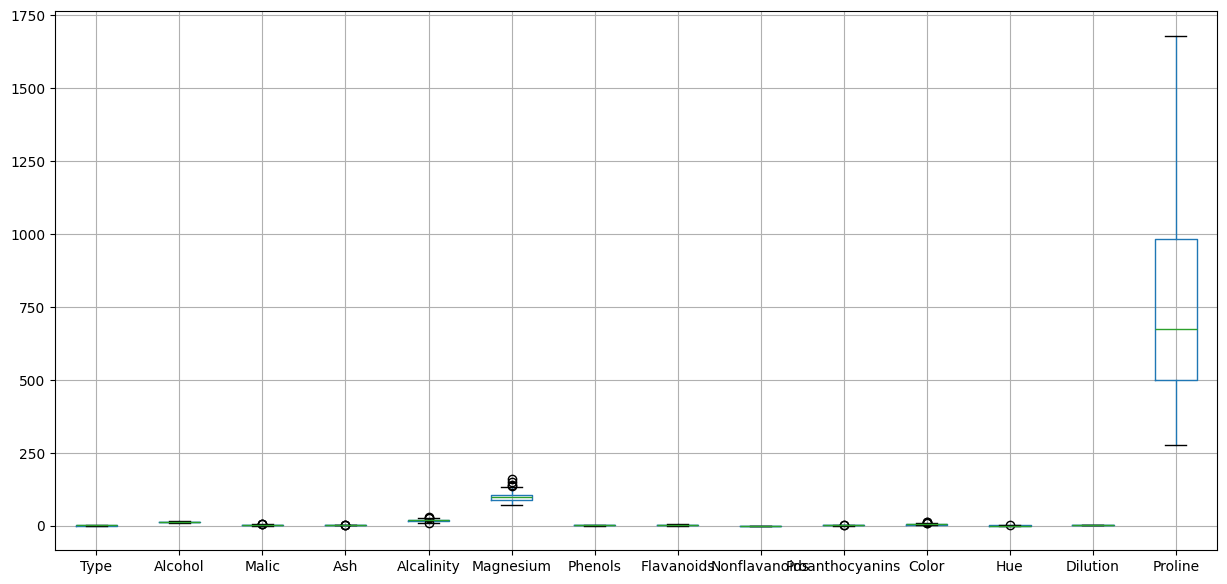

In [7]:
df.boxplot(figsize=(15,7))

## Standardizing data

In [8]:
scaler=StandardScaler()
scaled_df=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)

<Axes: >

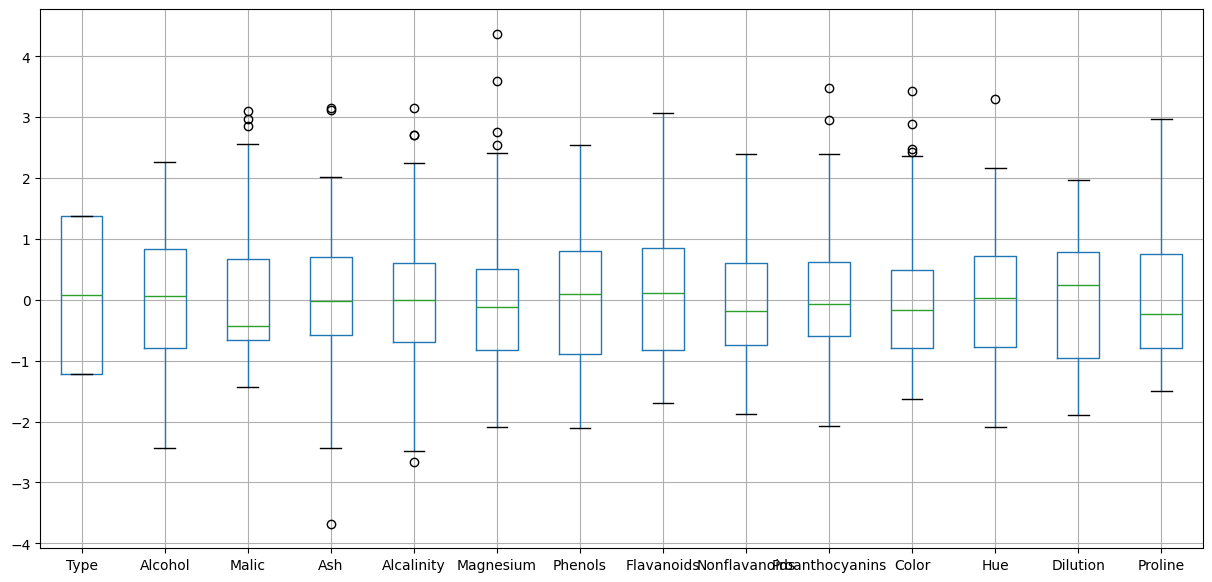

In [9]:
scaled_df.boxplot(figsize=(15,7))

## Dendogram for original data

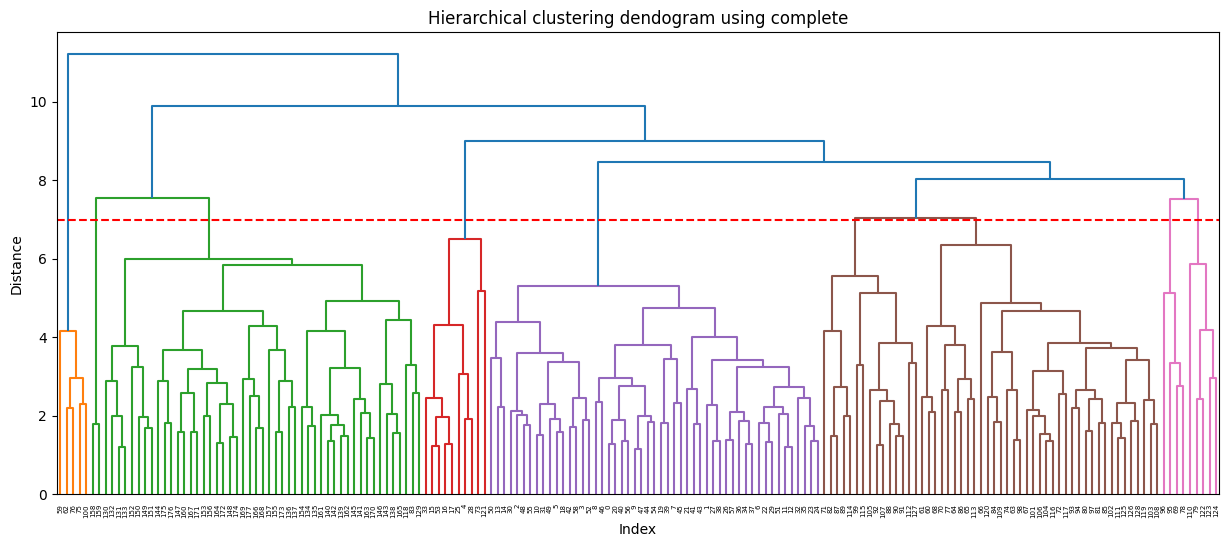

In [10]:
z=linkage(scaled_df,method='complete',metric='euclidean')
plt.figure(figsize=(15,6))
plt.title("Hierarchical clustering dendogram using complete")
plt.xlabel("Index")
plt.ylabel('Distance')
sch.dendrogram(z)
plt.axhline(y = 7, linestyle = '--', color = 'red')
plt.show()

## Creating clusters with original data

In [11]:
hc=AgglomerativeClustering(n_clusters=9)
scaled_df['cluster']=hc.fit_predict(scaled_df)
scaled_df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,cluster
0,-1.213944,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,4
1,-1.213944,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,4
2,-1.213944,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,8
3,-1.213944,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,8
4,-1.213944,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,1.373864,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952,1
174,1.373864,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893,1
175,1.373864,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575,1
176,1.373864,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498,1


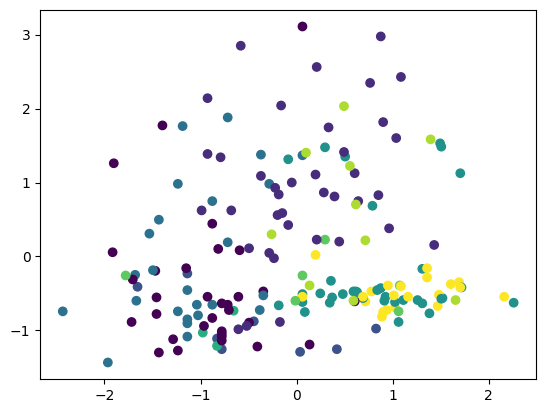

In [12]:
plt.scatter(x=scaled_df['Alcohol'],y=scaled_df['Malic'],c=scaled_df['cluster'])

## Silhouette score for original data

In [13]:
sil_score=silhouette_score(scaled_df,hc.fit_predict(scaled_df))
sil_score

0.3527522527506825

# Reducing dimentions using pca

In [14]:
from sklearn.decomposition import PCA
pca=PCA(n_components=14)
pca_values=pca.fit_transform(scaled_df)
pca_values

array([[ 2.98564390e+00,  1.60386720e+00, -1.22664978e+00, ...,
        -4.20443462e-01,  5.50094667e-01, -1.31644506e-01],
       [ 1.90592974e+00,  1.93710743e+00, -1.76024347e+00, ...,
        -1.30292494e-01,  3.95829087e-01, -2.51716999e-01],
       [ 5.69244674e+00, -2.84091134e-01,  8.07399857e-01, ...,
        -2.79099508e-01,  2.97635631e-03, -9.91170501e-02],
       ...,
       [-2.76936265e+00, -2.89862407e+00, -2.11290604e+00, ...,
         5.03049927e-01,  6.91526964e-01,  3.79999030e-01],
       [-2.66454538e+00, -2.53555031e+00, -1.44156326e+00, ...,
         3.14121597e-01,  3.40948213e-01,  1.43086965e-01],
       [ 1.79615182e+00, -5.58814309e+00,  7.77155041e-01, ...,
        -2.38729287e-01, -1.87611963e-01, -4.43217131e-01]])

In [15]:
pca.components_

array([[-2.30126535e-01,  1.84761199e-01, -9.10267118e-02,
         1.09702758e-01, -9.45911174e-02,  1.52698781e-01,
         2.09225879e-01,  2.23636271e-01, -1.18579424e-01,
         1.72376216e-01,  8.04280834e-02,  1.20312032e-01,
         1.42038250e-01,  2.44385132e-01,  7.88615378e-01],
       [-2.88113455e-01, -1.41962940e-01, -2.61283303e-01,
        -2.15024681e-01, -2.12147036e-01, -8.09242328e-02,
         2.44693178e-01,  2.89222038e-01, -2.50370691e-01,
         1.81570216e-01, -3.50927027e-01,  3.15433342e-01,
         3.68538758e-01,  3.34049316e-03, -3.64856376e-01],
       [ 3.53935436e-02, -4.19231218e-01, -8.50384194e-02,
         3.87058203e-01,  5.52476735e-01, -3.50080432e-02,
        -5.28689585e-03,  5.17144621e-02,  2.25958769e-01,
         3.80365788e-02, -3.37367746e-01,  2.44685534e-01,
         1.06079129e-01, -2.84214234e-01,  1.96381746e-01],
       [-4.93744929e-03,  1.38044828e-01,  4.37425335e-01,
         3.72043148e-01,  2.63739937e-01,  1.53113715

In [16]:
# varience
var=pca.explained_variance_ratio_
print("varience",var)
# cumulative varience
var1=np.cumsum(np.round(var,decimals=4)*100)
print("cumulative varience",var1)

varience [0.47222166 0.19353613 0.07473376 0.05566103 0.0419646  0.03745119
 0.02941832 0.02604924 0.01579473 0.01396392 0.01233088 0.0107987
 0.00807071 0.00538817]
cumulative varience [47.22 66.57 74.04 79.61 83.81 87.56 90.5  93.1  94.68 96.08 97.31 98.39
 99.2  99.74]


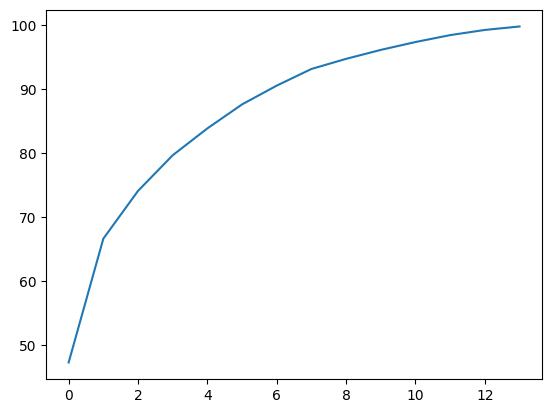

In [17]:
plt.plot(var1)

In [18]:
final_df=pd.DataFrame(pca_values[:,0:6],columns=['pca1','pca2','pca3','pca4','pca5','pca6'])
final_df.head()

,pca1,pca2,pca3,pca4,pca5,pca6
0,2.985644,1.603867,-1.226650,1.169941,0.708453,-0.965598
1,1.905930,1.937107,-1.760243,-0.956068,-0.309360,-0.578781
2,5.692447,-0.284091,0.807400,0.423932,-0.333402,1.068041
3,6.658699,-0.223303,-1.220624,1.063949,-0.299188,0.145803
4,3.360101,-0.594681,1.644857,0.741069,0.187899,-0.777466


## creating clusters with pca data

In [19]:
final_df['cluster']=hc.fit_predict(final_df)
final_df

,pca1,pca2,pca3,pca4,pca5,pca6,cluster
0,2.985644,1.603867,-1.226650,1.169941,0.708453,-0.965598,6
1,1.905930,1.937107,-1.760243,-0.956068,-0.309360,-0.578781,6
2,5.692447,-0.284091,0.807400,0.423932,-0.333402,1.068041,1
3,6.658699,-0.223303,-1.220624,1.063949,-0.299188,0.145803,1
4,3.360101,-0.594681,1.644857,0.741069,0.187899,-0.777466,5
...,...,...,...,...,...,...,...
173,-3.246710,-3.056635,-1.361037,1.374707,-0.979007,-0.429947,0
174,-2.906425,-2.386001,-0.675210,1.185121,0.161048,-0.290463,0
175,-2.769363,-2.898624,-2.112906,1.170577,1.144199,-0.248857,0
176,-2.664545,-2.535550,-1.441563,0.536802,1.027091,-0.518773,0


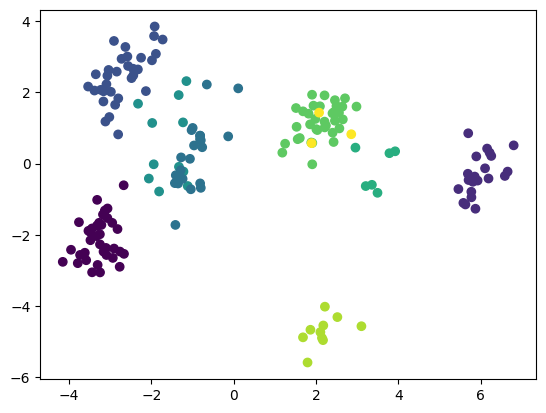

In [20]:
plt.scatter(x=final_df['pca1'],y=final_df['pca2'],c=final_df['cluster'])

## Dendogram for pca data

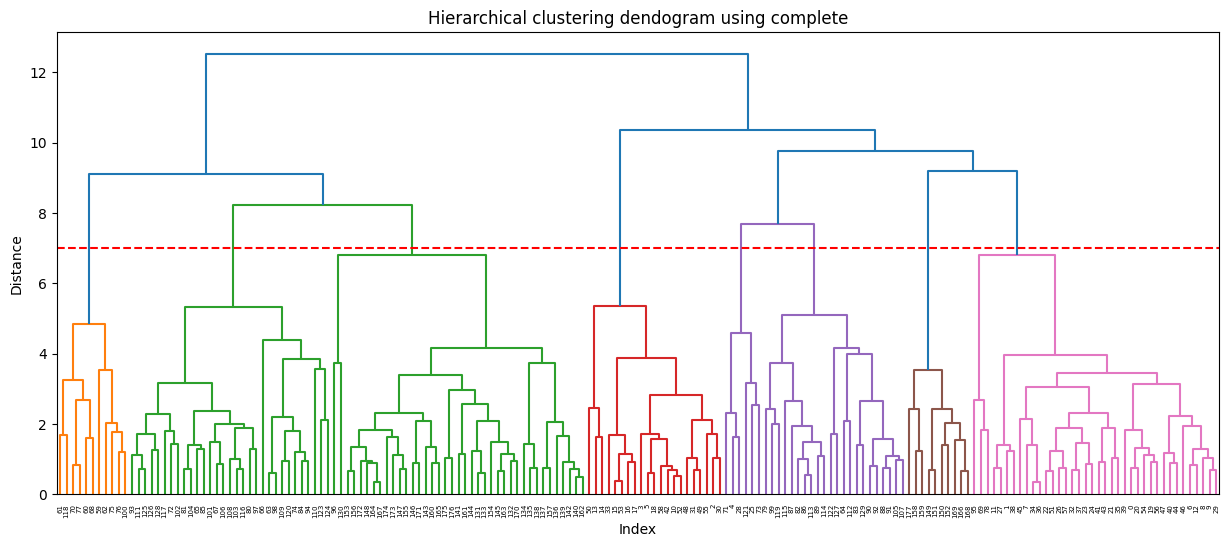

In [21]:
z=linkage(final_df,method='complete',metric='euclidean')
plt.figure(figsize=(15,6))
plt.title("Hierarchical clustering dendogram using complete")
plt.xlabel("Index")
plt.ylabel('Distance')
sch.dendrogram(z)
plt.axhline(y = 7, linestyle = '--', color = 'red')
plt.show()

## Silhouette score for pca data

In [22]:
silhouette_score(final_df,hc.fit_predict(final_df))

0.5182435772101294

The score improves after reducing the dimentionality of the dataset 

As it also improves the accuracy of clustering 